# Video Games Dataset 

## This Notebook is for exploring capabilities of langchain --> pandas compatible agents
* YT video that provided pattern for using langchain agent: [[video]](https://www.youtube.com/watch?v=rFQ5Kmkd4jc) 
* Source file for the Games DF: [[source]](https://corgis-edu.github.io/corgis/csv/video_games/)

In [1]:
from Functions.General_Func import print_X, delete_variables

print_X("My functions imported")

==================== My functions imported ====================


In [2]:
import pandas as pd
from langchain.chat_models import ChatOpenAI
from langchain.agents import create_pandas_dataframe_agent

print_X("General modules imported")


================== General modules imported ==================


## 1️⃣ Loading Games Dataset, .info(), .describe()

In [84]:
print_X('Function to group platforms')

trimed_platforms = ['Nintendo', 'PlayStation', 'Dreamcast','Xbox', 'Wii', 'PC', 'Switch', 'GameCube', 'Game Boy', '3DS', 'DS', 'PSP', 'Stadia']

def trim_platforms(platform):
    for p in trimed_platforms:
        if p.lower() in platform.lower():
            return p
    return platform


================= Function to group platforms =================


In [88]:
print_X("Reading DataFrame")

df_games = (
    pd.read_csv('./data/all_games.csv', parse_dates=['release_date']).
    assign(
        release_year=lambda x: x['release_date'].dt.year,
        release_quarter=lambda x: x['release_date'].dt.quarter,
        resase_month=lambda x: x['release_date'].dt.month,
        platform_G=lambda x: x['platform'].apply(trim_platforms).astype('category'),
        platform=lambda x: x['platform'].astype('category'),
        meta_score=lambda x: x['meta_score'].fillna(0).astype('int'),
        user_review=lambda x: pd.to_numeric(x['user_review'], errors='coerce').astype('float')
    )
        .drop(columns=['summary',  'release_date'])
        .set_index('name')
)

df_games[:3]

====================== Reading DataFrame ======================


,platform,meta_score,user_review,release_year,release_quarter,resase_month,platform_G
name,,,,,,,
The Legend of Zelda: Ocarina of Time,Nintendo 64,99,9.1,1998,4,11,Nintendo
Tony Hawk's Pro Skater 2,PlayStation,98,7.4,2000,3,9,PlayStation
Grand Theft Auto IV,PlayStation 3,98,7.7,2008,2,4,PlayStation


In [87]:
print_X('DataFrame info')
df_games.info()

======================= DataFrame info =======================
<class 'pandas.core.frame.DataFrame'>
Index: 18800 entries, The Legend of Zelda: Ocarina of Time to Leisure Suit Larry: Box Office Bust
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   platform         18800 non-null  category
 1   meta_score       18800 non-null  int32   
 2   user_review      17435 non-null  float64 
 3   release_year     18800 non-null  int64   
 4   release_quarter  18800 non-null  int64   
 5   resase_month     18800 non-null  int64   
 6   platform_G       18800 non-null  category
dtypes: category(2), float64(1), int32(1), int64(3)
memory usage: 845.9+ KB


In [78]:
df_games['user_review'].isna().sum()

1365

these `1365` are 'tbd' records, that were replaced with NaNs

In [89]:
print_X("Dropping NaNs, Shape dfter drop")
df_games.dropna(inplace=True)
df_games.shape

=============== Dropping NaNs, Shape dfter drop ===============


(17435, 7)

2️⃣ Firts analysis by Yeard and Brands

<AxesSubplot:>

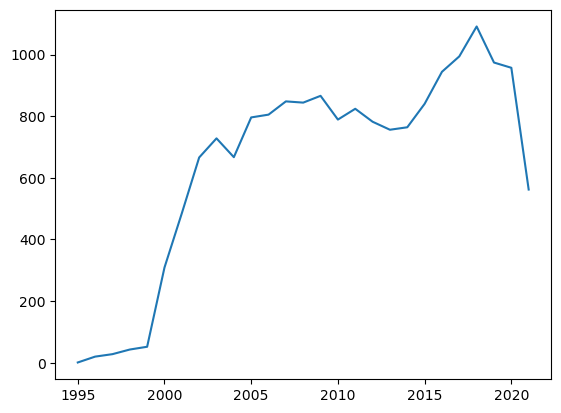

In [93]:
df_games['release_year'].value_counts().sort_index().plot(kind='line')